<a href="https://colab.research.google.com/github/Eminent01/Binary-Naive-Bayes-Sentimental-Analysis/blob/master/Binary_Naive_Bayes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Import necessary librariessary libaries

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

##Import the dataset

In [145]:
# data=pd.read_csv("/content/IMDB Dataset.csv", sep=',')

### Convert all the letters in the text word to lower case

In [147]:
# data1=data.apply(lambda x: x.astype(str).str.lower())
# data1

##Expand contractions in the text file

In [ ]:
# !pip install contractions

In [ ]:
# import contractions
# import re

In [148]:
# contractions_dict = {"ain't": "are not","'s":" is","aren't": "are not", "i've": "i have", "i'm":"i am"}
# # Regular expression for finding contractions
# contractions_re=re.compile('(%s)' % '|'.join(contractions_dict.keys()))
# def expand_contractions(text,contractions_dict=contractions_dict):
#     def replace(match):
#         return contractions_dict[match.group(0)]
#     return contractions_re.sub(replace, text)
# # Expanding Contractions in the reviews
# data1['review']=data1['review'].apply(lambda x:expand_contractions(x))

##Remove punctuations

In [149]:
# def remove_punctuation(text):
#   '''a function for removing punctuation'''
#   import string
#   # replacing the punctuations with no space, 
#   # which in effect deletes the punctuation marks 
#   translator = str.maketrans('', '', string.punctuation)
#   # return the text stripped of punctuation marks
#   return text.translate(translator)

In [150]:
# data['review'] = data['review'].apply(remove_punctuation)
# data.head(10)

###Convert the sentiment to numerical value......1 for positive and 0 for negative

In [ ]:
#Convert the sentiment to numerical value......1 for positive and 0 for negative
# data = data.replace({'sentiment': {'positive': 1, 'negative': 0}})

In [ ]:
# data['label'] = np.where(data['sentiment']=='positive',1,0)

##Removing the stopwords

In [151]:
# import nltk
# nltk.download('stopwords')

In [ ]:
# from nltk.corpus import stopwords

In [152]:
# extracting the stopwords from nltk library

# sw = stopwords.words('english')
# displaying the stopwords
# np.array(sw)

In [153]:
#A function to remove the stopwords
# def stopwords(text):
#     text = [word.lower() for word in text.split() if word.lower() not in sw]
#     # joining the list of words with space separator
#     return " ".join(text)

In [154]:
# data['review'] = data['review'].apply(stopwords)
# data.head(10)

##Data Preprocessing

In [2]:
from collections import Counter

from pyparsing import WordStart
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import string
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
import requests
from io import StringIO
import math


class PreprocessData:
    def __init__(self,path,lang='english'): 
        self.dataset=pd.read_csv(path, sep=",")
        self.stopwords=stopwords.words(lang)
        self.preprocess()
    
    @staticmethod
    def remove_punctuation(text):
        '''a function for removing punctuation'''
        # replacing the punctuations with no space, 
        # which in effect deletes the punctuation marks 
        translator = str.maketrans('', '', string.punctuation)
        # return the text stripped of punctuation marks
        return text.translate(translator)

    def replace_sentiment(self):
    #Convert the sentiment to numerical value......1 for positive and 0 for negative
        self.dataset = self.dataset.replace({'sentiment': {'positive': 1, 'negative': 0}})

    #A function to remove the stopwords
    def remove_stopwords(self,text):
        text = [word.lower() for word in text.split() if word.lower() not in self.stopwords]
        # joining the list of words with space separator
        return " ".join(text)

    def preprocess(self):
        self.dataset['review'] = self.dataset['review'].apply(self.remove_punctuation)
        self.dataset['review'] = self.dataset['review'].apply(self.remove_stopwords)
        self.replace_sentiment()


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


##Word Representation

In [3]:
class WordRepresentation:
    def __init__(self,dataset):
        self.dataset=dataset
        self.ponderations={}
        self.vectors={}
        self.frequencies={}
        self.length=0 #The number of words on the dataset
        self.tf_idf()
        self.one_hot()
        self.frequency()
    
    #One hot
    def one_hot(self):
        if self.ponderations or self.frequencies:
            #The case if we have the ponderations or the frequencies , we don't need to search the words again
            #This condition will reduce the time complexity a lot   
            words_dict={}
            if self.ponderations:
                words_dict=self.ponderations
            else:
                words_dict=self.frequencies
            for word in words_dict:
                self.vectors[word]=np.zeros(len(self.dataset))
        else:
            for i in range(len(self.dataset)):
                document=self.dataset.iloc[i,0]
                word_list=document.split(" ")
                for word in word_list:
                    if word not in self.vectors:
                        self.vectors[word]=np.zeros(len(self.dataset))
        #Now we have all the words initialized as vector zero of size the length of the dataset
        for word in self.vectors:
            for i in range(len(self.dataset)):
                document=self.dataset.iloc[i,0]
                if word in document:
                    self.vectors[word][i]=1




    #Frequency encoding
    def frequency(self):
        if self.ponderations or self.vectors:
            #The case if we have the ponderations or the frequences =, we don't need to search the words again
            #This condition will reduce the time complexity a lot
            
            words_dict={}
            if self.ponderations:
                words_dict=self.ponderations
            else:
                words_dict=self.vectors
            for word in words_dict:
                self.frequencies[word]=np.zeros(len(self.dataset))
        else:
            for i in range(len(self.dataset)):
                document=self.dataset.iloc[i,0]
                word_list=document.split(" ")
                for word in word_list:
                    if word not in self.frequencies:
                        self.frequencies[word]=np.zeros(len(self.dataset))
        #Now we have all the words initialized as zero scalar
        self.compute_length()
        for word in self.frequencies:
            for i in range(len(self.dataset)):
                document=self.dataset.iloc[i,0]
                if word in document:
                    self.frequencies[word][i]=document.count(word)/self.length
    
    
    #This function takes a word and count the number of occurences of the word in the document
    # def count_word(self,word,document):
    #     sum=0
    #     for i in range(len(self.dataset)):
    #         document=self.dataset.iloc[i,0]
    #         sum+=document.count(word)
    #     return sum
    #This function compute the length 
    def compute_length(self):
        for i in range(len(self.dataset)):
            document=self.dataset.iloc[i,0]
            word_list=document.split(" ")
            self.length+=len(word_list)
    

    



    #TF_IDF
    def term_frequency(self,word,document):
        #Frequence of the word over number of word of document
        word_list=document.split(" ")
        dict=Counter(word_list) #Give a dictionnary which the keys are the words and the values are the number of occurences in word_list
        return dict[word]/len(word_list)
    
    def inverse_document_frequency(self,word,document):
        N=len(self.dataset)
        #Contains return a list of True or False
        doc_t=len(self.dataset[self.dataset['review'].str.contains(word)])
        return math.log(N/doc_t)

    def tf_idf(self):
        if self.vectors or self.frequencies:
            #The case if we have the vectors or the frequencies , we don't need to search the words again
            #This condition will reduce the time complexity a lot   
            words_dict={}
            if self.vectors:
                words_dict=self.vectors
            else:
                words_dict=self.frequencies
            for word in words_dict:
                self.vectors[word]=np.zeros(len(self.dataset))
        else:
            for i in range(len(self.dataset)):
                document=self.dataset.iloc[i,0]
                word_list=document.split(" ")
                for word in word_list:
                    if word not in self.ponderations:
                        self.ponderations[word]=np.zeros(len(self.dataset))

        for word in self.ponderations:
            for i in range(len(self.dataset)):
                document=self.dataset.iloc[i,0]
                if word in document:
                    self.ponderations[word][i]=self.term_frequency(word,document)*self.inverse_document_frequency(word,document)








In [158]:
# path="/Users/aba/Desktop/BNB/IMDB_Dataset.csv"
# documents=PreprocessData(path)
# words=WordRepresentation(documents.dataset.iloc[:5,:])
# print(words.frequencies)
# #vectors=words.vectors

In [4]:
path="/content/IMDB Dataset.csv"

In [5]:
documents=PreprocessData(path)

In [6]:
doc= documents.dataset

In [7]:
doc

,review,sentiment
0,one reviewers mentioned watching 1 oz episode ...,1
1,wonderful little production br br filming tech...,1
2,thought wonderful way spend time hot summer we...,1
3,basically theres family little boy jake thinks...,0
4,petter matteis love time money visually stunni...,1
...,...,...
49995,thought movie right good job wasnt creative or...,1
49996,bad plot bad dialogue bad acting idiotic direc...,0
49997,catholic taught parochial elementary schools n...,0
49998,im going disagree previous comment side maltin...,0


In [83]:
# label=doc.sentiment

In [ ]:
words=WordRepresentation(documents.dataset.iloc[:5000,:])

In [217]:
tf_idf=words.ponderations

In [184]:
# C_frequency=words.frequencies

In [167]:
doc1=words.vectors

In [218]:
vec=pd.DataFrame(tf_idf)

In [219]:
 vec["label"]=doc.iloc[:100,-1]

In [259]:
vec

,one,reviewers,mentioned,watching,1,oz,episode,youll,hooked,right,...,describe,360,gamesbr,gripes,upside,restart,superb,challenging,wiibr,label
0,0.002003,0.026931,0.018824,0.022189,0.005658,0.077756,0.045755,0.026931,0.022877,0.020056,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1
1,0.003805,0.000000,0.000000,0.021079,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1
2,0.003892,0.000000,0.000000,0.021558,0.000000,0.000000,0.000000,0.000000,0.000000,0.019486,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1
3,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0
4,0.015807,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1
96,0.006715,0.000000,0.000000,0.018599,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0
97,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0
98,0.003644,0.000000,0.000000,0.020182,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0


In [258]:
#s=vec.to_numpy()
#print(s)
#type(s)

[[0.00200287 0.02693082 0.01882384 ... 0.         0.         1.        ]
 [0.00380545 0.         0.         ... 0.         0.         1.        ]
 [0.00389194 0.         0.         ... 0.         0.         1.        ]
 ...
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.00364351 0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.01656536 0.01656536 1.        ]]


numpy.ndarray

In [260]:
size=int(0.8*len(vec.iloc[:100]))
size

80

In [261]:
Xtrain=vec.iloc[:size,:-1]
Xtest=vec.iloc[size:,:-1]

In [262]:
Xtrain = Xtrain.to_numpy()
type(Xtrain)

numpy.ndarray

In [263]:
Xtest = Xtest.to_numpy()
type(Xtest)

numpy.ndarray

In [225]:
ytrain=vec.iloc[:size,-1]
ytest=vec.iloc[size:,-1]

In [264]:
ytrain = ytrain.to_numpy()

In [269]:
ytest = ytest.to_numpy()

In [265]:
# words.ponderations

In [266]:
# pond=words.ponderations

In [267]:
# train={}
# test={}
# i=0
# for word in pond:
#   if i<size:
#     train[word]=pond[word]
#   else:
#     test[word]=pond[word]
#   i+=1

In [287]:
import numpy as np 


class BinaryNaiveBayes:
  def fit(self, X, y):
    n_samples, n_features = X.shape
    self._classes = np.unique(y)
    n_classes = len(self._classes)

    # calculate mean, var, and prior for each class
    self._mean = np.zeros((n_classes, n_features), dtype=np.float64)
    self._var = np.zeros((n_classes, n_features), dtype=np.float64)
    self._priors = np.zeros(n_classes, dtype=np.float64)

    for idx, c in enumerate(self._classes):
       X_c = X[y == c]
       self._mean[idx, :] = X_c.mean(axis=0)
       self._var[idx, :] = X_c.var(axis=0)
       self._priors[idx] = X_c.shape[0] / float(n_samples)

  def predict(self, X):
     y_pred = [self._predict(x) for x in X]
     return np.array(y_pred)

  def _predict(self, x):
    posteriors = []

    for idx, c in enumerate(self._classes):
      prior = np.log(self._priors[idx])
      posterior = np.sum(np.log(self._pdf(idx, x)))
      posterior = prior + posterior
      posteriors.append(posterior)
  
    # return class with highest posterior probability
    return self._classes[np.argmax(posteriors)]

  def _pdf(self, class_idx, x):
    mean = self._mean[class_idx]
    var = self._var[class_idx]
    
    numerator = np.exp(-(x - mean) ** 2) / (2 * var)
    denominator = np.sqrt(2 * np.pi * var)
    return numerator / denominator

def accuracy(y_true, y_pred):
  accuracy = np.sum(y_true == y_pred) / len(y_true)
  return accuracy

In [288]:
bnb = BinaryNaiveBayes()
bnb.fit(Xtrain, ytrain)

In [289]:
predictions = bnb.predict(Xtest)
print(predictions)
print("Naive Bayes classification accuracy", accuracy(ytest, predictions))

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
Naive Bayes classification accuracy 0.7


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:41: RuntimeWarning: divide by zero encountered in true_divide


In [290]:
from sklearn.metrics import confusion_matrix

In [294]:
from sklearn.metrics._plot.confusion_matrix import ConfusionMatrixDisplay


[Text(0, 0.5, 'True'), Text(0.5, 0, 'Predicted')]

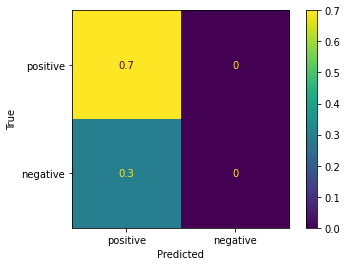

In [295]:
cm = confusion_matrix(ytest, predictions, normalize='all')
cmd = ConfusionMatrixDisplay(cm, display_labels=['positive','negative'])
cmd.plot()
cmd.ax_.set(xlabel='Predicted', ylabel='True')
